# Computable Dart Board

### This build on the Physical Dart Board we used in the first class period!
### First we are going to form teams and elect captain for each team. 
Your team name will be sected from the combination of the text formed by <span style="color:blue">***random adjective-random noun***</span> for example it could be <span style="color:red">***lazy-ficus***

<img src="https://thebushschool.github.io/fcsr/geometry/pi1.png" align="left" width=400 />
Here we have a circular dart board with radius R inscribed in a square. If you threw <span style="color:red"</span>A LOT OF DARTS</span> then Area = number of darts!

$$Circle\_Area={\pi}\times{R}^2$$

$$Square\_Area=(2\times{R})^2$$

$$\frac{Square\_Area}{Circle\_Area}=\frac{4\times{R}^2}{\pi\times{R}^2}=\frac{4}{\pi}$$

$$\frac{Darts\_in\_Square}{Darts\_in\_Circle}=\frac{4}{\pi}$$
$${\pi}={4}\times(\frac{Darts\_in\_Circle}{Darts\_in\_Square})$$

<span style="color:blue">Rearrange this to find PI using your calculator and write it in your notebook!</span>  Which team came the closest to the corect value ??



## Let the computer play Darts to calculate PI throw hundreds of Darts !!
1. We will walk through each code cell below!

In [1]:
totalThrows=100   # how many times we throw the dart

In [2]:
import board
import neopixel
from time import sleep

In [3]:
pixel_pin = board.D18
num_pixels = 100
ORDER = neopixel.RGB
pixels = neopixel.NeoPixel(pixel_pin, num_pixels, 
                           brightness=0.1, auto_write=False,
                           pixel_order=ORDER)

In [4]:
def reset():
    for ii in range(num_pixels):
        pixels.fill((0,0,0))
        pixels[ii]=((0,0,0))
        pixels.show()
    sleep(2)

In [5]:
def initialize():   # set leds white-off
    for ii in range(3):         # flash white 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((255,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.2)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()    

In [6]:
# Creating pixel conversion 2-D Array 
import math
import numpy as np

P = np.array([[90,91,92,93,94,95,96,97,98,99], 
              [89,88,87,86,85,84,83,82,81,80],
              [70,71,72,73,74,75,76,77,78,79], 
              [69,68,67,66,65,64,63,62,61,60],
              [50,51,52,53,54,55,56,57,58,59], 
              [49,48,47,46,45,44,43,42,41,40],
              [30,31,32,33,34,35,36,37,38,39], 
              [29,28,27,26,25,24,23,22,21,20],
              [10,11,12,13,14,15,16,17,18,19], 
              [ 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])  

def pix(x,y):  
    p = math.trunc(5*(x+0.99))
    q = math.trunc(5*(y-0.99))    
    r = abs(q)
    c = abs(p)
    #print(f'r = {r} c = {c}')
    return P[r][c]

In [7]:
#function to setup the plot and dartboard
import numpy as np
import matplotlib.pyplot as plt

def plot_dartboard(fig, axs):
    theta = np.linspace(0, 2*np.pi, num_pixels)
    radius = 1
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)
    axs.plot(a,b)

In [8]:
reset()

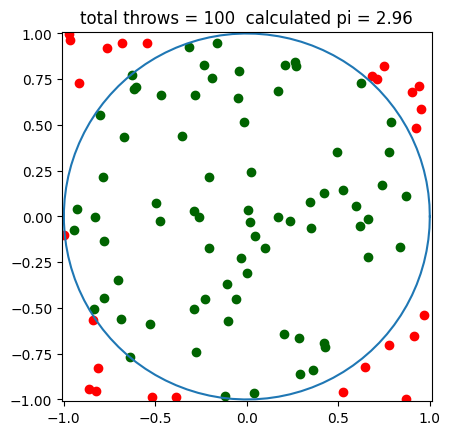

   --- threw 100 darts in 28.88 seconds ---


In [9]:
#Derive PI from a circle inscribed in a square
import random,math,time
import matplotlib.pyplot as plt

# setup plot
start_time = time.time()
fig, axs = plt.subplots(1)
plt.margins(0.005, tight=True)
axs.set_aspect(1)

# plot the dartboard itself
plot_dartboard(fig, axs)

# reset neopixel array
reset()
initialize()

throwsInsideCircle = 0 # starting value for a counter
throwsOutsideCircle = 0
for throw in range(totalThrows): # loop
  x = random.random()*2 -1 # a random x value between [-1.0000,0.99999] not including 1
  y = random.random()*2 -1 # a random y value between [-1.0000,0.99999] not including 1

  if(x*x + y*y <= 1.0): # if inside the circle (distance squared)
    throwsInsideCircle += 1 
    plt.scatter(x, y, color='darkgreen')
    pixels[pix(x,y)]=((0,255,0))
  else:
    throwsOutsideCircle += 1
    plt.scatter(x, y, color='red')
    pixels[pix(x,y)]=((255,0,0))
    
  # all done, compute pi
  pi = (4.0*throwsInsideCircle)/(throwsInsideCircle + throwsOutsideCircle)
  #print(pi) 
  #print("--- %s seconds ---" % (time.time() - start_time))

  # show darts in neopixel array
  pixels.show()
  #print('throws so far = ' + str(throw+1) + '  calculated pi = ' + str(pi))
  sleep(.2)

plt.title('total throws = ' + str(totalThrows) + '  calculated pi = ' + str(pi))    
plt.show()
end_time = time.time()
elapsed_time = end_time-start_time
print(f'   --- threw {(throwsInsideCircle + throwsOutsideCircle)} darts in {elapsed_time:.2f} seconds ---')

In [11]:
sleep(30)
reset()